## Read Data
### Resources Used
- [Waveform Database Software Package](https://github.com/MIT-LCP/wfdb-python)
- [WFDB Demo Scripts](https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb)
- [WFDB EDF API](https://wfdb.readthedocs.io/en/latest/convert.html#module-wfdb.io.convert.edf)
- [MNE Library Install](https://mne.tools/stable/install/index.html)
- [MNE Python](https://github.com/mne-tools/mne-python/blob/maint/0.20/mne/datasets/sleep_physionet/age.py#L18-L111)
- [Physionet Sleep-EDF Database](https://www.physionet.org/content/sleep-edfx/1.0.0/)

In [2]:
%pip install mne
%pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 14.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 13.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 13.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 10.2 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 7.2 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.7/

In [3]:
import wfdb
import wfdb.io.convert

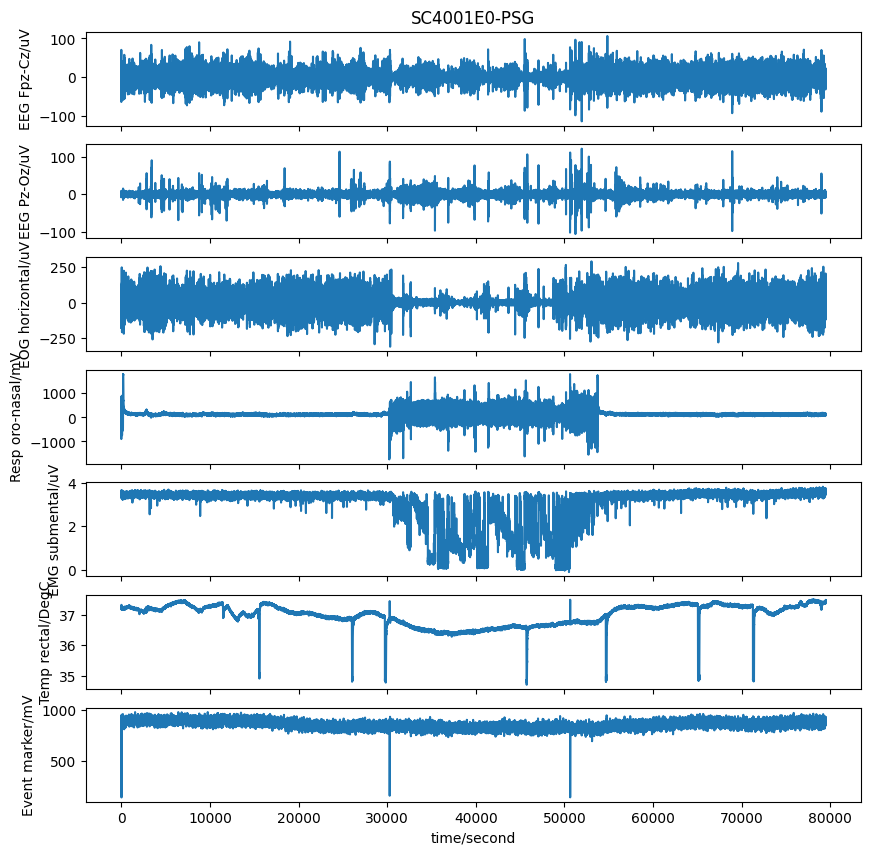

{'record_name': 'SC4001E0_PSG',
 'n_sig': 7,
 'fs': 1,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 79500,
 'base_time': datetime.time(16, 13),
 'base_date': datetime.date(1989, 4, 24),
 'comments': [],
 'sig_name': ['EEG Fpz-Cz',
  'EEG Pz-Oz',
  'EOG horizontal',
  'Resp oro-nasal',
  'EMG submental',
  'Temp rectal',
  'Event marker'],
 'p_signal': array([[-8.45268864e+00,  3.87721612e-01, -1.59665934e+00, ...,
          3.55000000e+00,  3.72053763e+01,  9.19000000e+02],
        [ 9.53107692e+00,  4.70256410e+00, -2.51868083e+01, ...,
          3.48800000e+00,  3.72268817e+01,  8.98000000e+02],
        [-1.24408498e+01, -8.06057875e+00,  5.86378071e+01, ...,
          3.47400000e+00,  3.72354839e+01,  9.18000000e+02],
        ...,
        [-8.51551648e+00,  4.88874725e+00,  9.23992674e+00, ...,
          3.54400000e+00,  3.74387097e+01,  8.83000000e+02],
        [ 1.44053919e+01, -2.44821245e+00,  5.88299976e+01, ...,
          3.66400000e+00,  3.74494624e+01,  8.970000

In [11]:
#Plot data and display data
record = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4001E0-PSG.edf')
wfdb.plot_wfdb(record=record, title='SC4001E0-PSG', figsize=(10,10)) #plot signals
display(record.__dict__)

In [19]:
record2 = wfdb.io.convert.edf.read_edf('sleep-edf-database/sleep-cassette/SC4002E0-PSG.edf')
display(len(record2.__dict__['p_signal']))

84900

In [18]:
#each entry (i) is a second, and info in first index is EEG data
record1EegData = list()
for i in record2.__dict__['p_signal']:
    # print(i[0])
    record1EegData.append(i[0])
print(record1EegData)

[1.6374505494505491, 3.325816849816851, -14.141340659340663, -3.996886446886447, 34.51476923076923, -31.902791208791214, 14.627076923076924, -14.98959706959707, 16.411164835164833, -5.098703296703296, 1.6506886446886444, -1.2749304029304027, -9.716761904761904, 27.585135531135528, -25.018981684981686, 1.123201465201465, 11.590461538461538, -12.765597069597067, 13.710593406593405, 2.9704249084249104, 6.99480586080586, -21.70131135531135, 5.802358974358973, 7.652637362637363, -0.09775824175824134, 18.41317216117216, -37.82327472527472, 29.485311355311357, -3.3013772893772897, -12.502871794871792, 14.7543663003663, -20.072007326007327, 17.23396336996337, -11.975384615384614, 23.63610989010989, -0.4429670329670328, -29.81015384615385, -10.877641025641026, 63.507216117216124, -19.802153846153843, -12.91732600732601, 5.051860805860805, -10.77886446886447, 25.78169963369963, -8.651604395604394, -39.83648351648351, 62.354483516483526, 20.137179487179484, -51.21208058608059, 29.05252747252747, 